<a href="https://colab.research.google.com/github/hyjass/jaskarans/blob/main/STOCK_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [190]:
df = pd.read_csv('https://github.com/plotly/datasets/raw/master/tesla-stock-price.csv')
df.head()
df=df.drop(0)

In [191]:
df.shape


(756, 6)

In [192]:
df.describe()


,close,open,high,low
count,756.000000,756.000000,756.000000,756.000000
mean,272.648466,272.771585,277.127065,268.025041
std,58.417181,58.487749,59.233832,57.553428
min,143.670000,142.320000,154.970000,141.050000
25%,219.552500,219.627500,222.526750,216.055000
50%,277.650000,277.692500,280.949950,273.775000
75%,322.722500,321.797500,327.152500,316.565075
max,385.000000,386.690000,389.610000,379.345000


In [193]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 1 to 756
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    756 non-null    object 
 1   close   756 non-null    float64
 2   volume  756 non-null    object 
 3   open    756 non-null    float64
 4   high    756 non-null    float64
 5   low     756 non-null    float64
dtypes: float64(4), object(2)
memory usage: 35.6+ KB


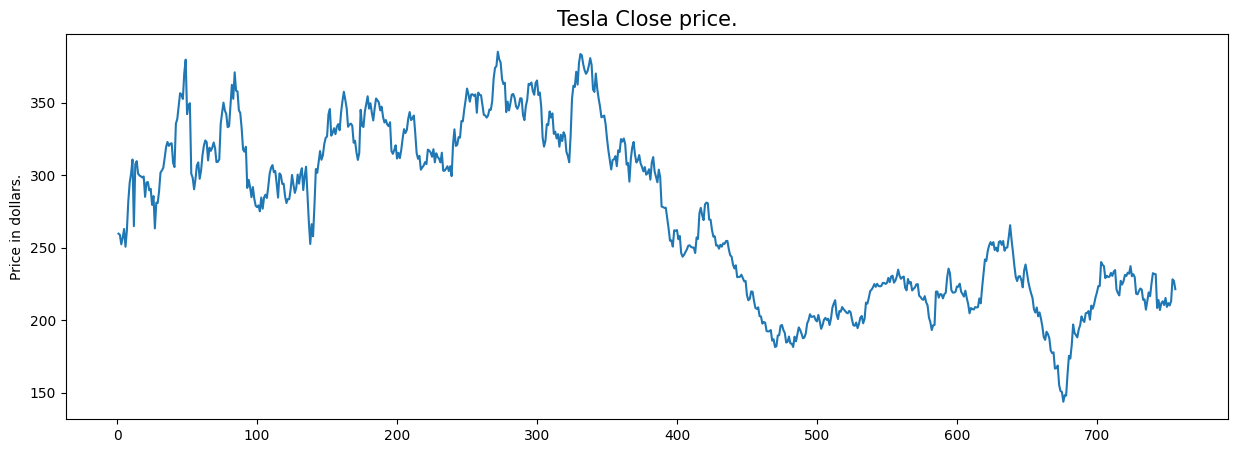

In [194]:
plt.figure(figsize=(15,5))
plt.plot(df['close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


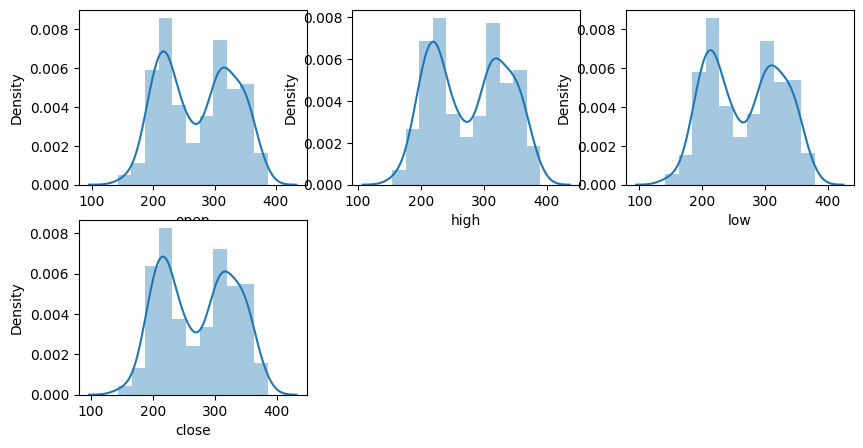

In [195]:
features = ['open', 'high', 'low', 'close']

plt.subplots(figsize=(10,5))

for i, col in enumerate(features):
 plt.subplot(2,3,i+1)
 sb.distplot(df[col])
plt.show()



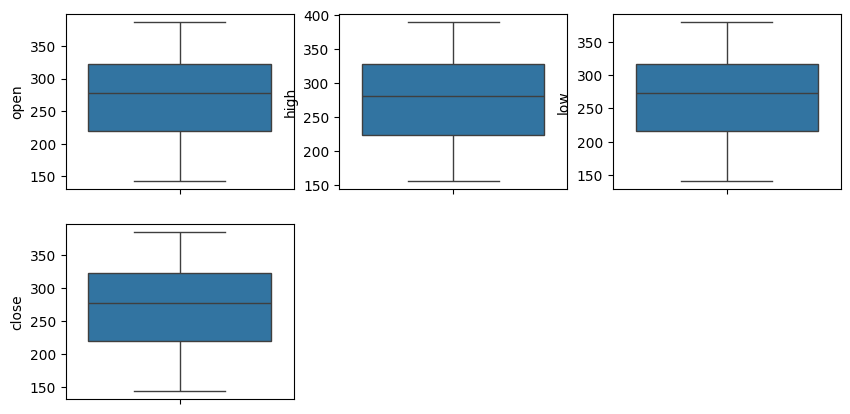

In [196]:
plt.subplots(figsize=(10,5))
for i, col in enumerate(features):
 plt.subplot(2,3,i+1)
 sb.boxplot(df[col])
plt.show()


In [197]:
splitted = df['date'].str.split('/', expand=True)


df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()

,date,close,volume,open,high,low,day,month,year
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367,15,10,2018
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100,12,10,2018
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300,11,10,2018
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700,10,10,2018
5,2018/10/09,262.80,12037780.0000,255.25,266.77,253.3000,9,10,2018


In [198]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,date,close,volume,open,high,low,day,month,year,is_quarter_end
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367,15,10,2018,0
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100,12,10,2018,0
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300,11,10,2018,0
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700,10,10,2018,0
5,2018/10/09,262.80,12037780.0000,255.25,266.77,253.3000,9,10,2018,0


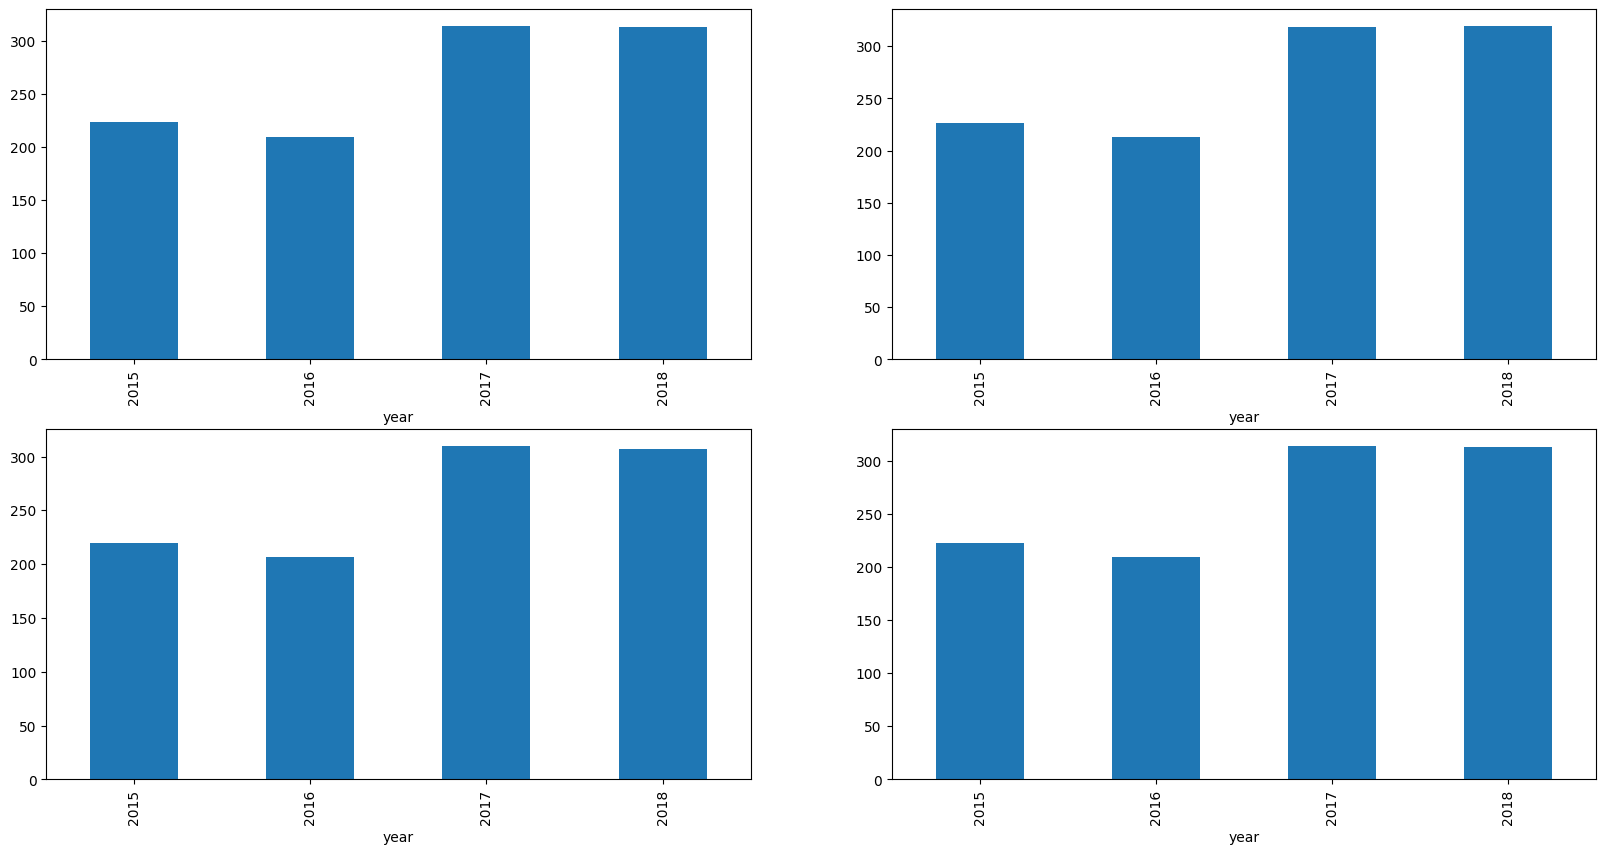

In [199]:
data_grouped = df.groupby('year').mean(numeric_only=True)
plt.subplots(figsize=(20,10))

for i, col in enumerate(['open', 'high', 'low', 'close']):
 plt.subplot(2,2,i+1)
 data_grouped[col].plot.bar()
plt.show()



In [200]:
df.groupby('is_quarter_end').mean(numeric_only=True)


,close,open,high,low,day,month,year
is_quarter_end,,,,,,,
0,271.558685,271.712826,276.030614,266.851641,15.627490,6.107570,2016.816733
1,274.802283,274.864094,279.294067,270.344123,15.862205,7.417323,2016.728346


In [201]:
df['open-close'] = df['open'] - df['close']
df['low-high'] = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)


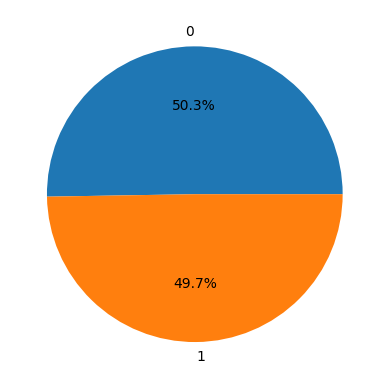

In [202]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


In [203]:
df['date'] = pd.to_datetime(df['date'])

# Extract numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

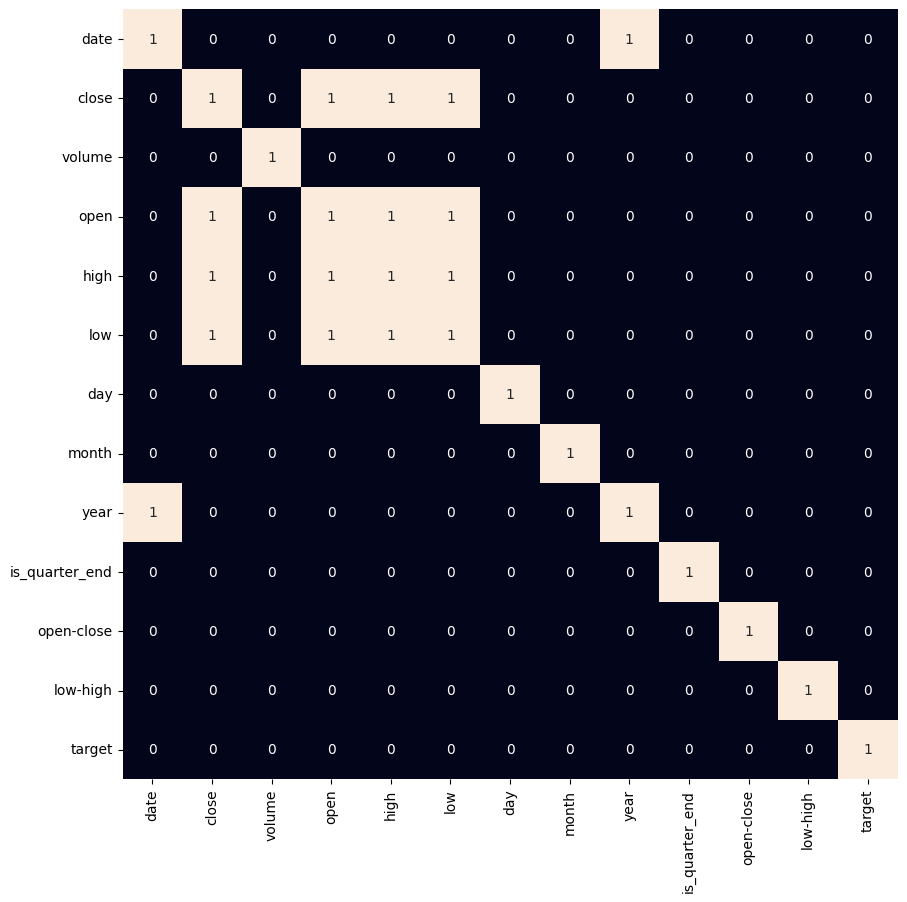

In [204]:
plt.figure(figsize=(10,10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [205]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
X_train.shape, X_valid.shape


((680, 3), (76, 3))

In [206]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
 models[i].fit(X_train, Y_train)

 print(f'{models[i]} : ')
 print('Training Accuracy : ', metrics.roc_auc_score(
	Y_train, models[i].predict_proba(X_train)[:,1]))
 print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_valid, models[i].predict_proba(X_valid)[:,1]))
 print()


LogisticRegression() : 
Training Accuracy :  0.9116522491349481
Validation Accuracy :  0.9277777777777778

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.9093771626297577
Validation Accuracy :  0.9086805555555556

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

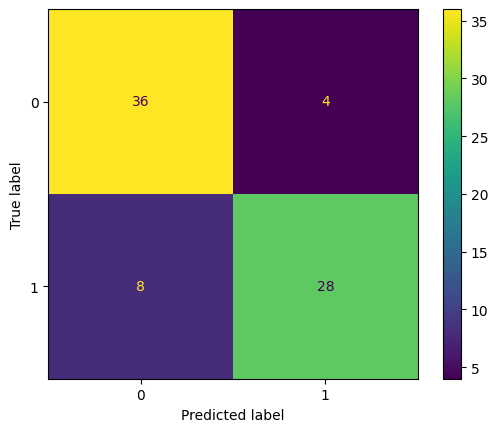

In [207]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_valid, models[0].predict(X_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=models[0].classes_)
disp.plot()
plt.show()
